In [35]:
import pandas as pd
import requests
from selenium.common.exceptions import TimeoutException
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import datetime
from trading_bot import *
import plotly
plotly.tools.set_credentials_file(username='dkema', api_key='nTKqDrhYl2Hko259wGGk')
pd.options.display.max_columns = 100

def calculate_positions(myticker, positions, dateTimeMask):
    #get all histro
    df = getData(ticker=myticker)
    
    mymask = ((df["datetime"] > dateTimeMask))
    
    cols = df.columns.tolist()
    #slice to the columns we are interested in
    reduced_df = df[[cols[0],
                    cols[1],
                    cols[3],
                    cols[5],
                    cols[7],
                     cols[-2],
                    ]].loc[mymask].reset_index(drop=True).set_index("datetime").astype(float
                                                                                    )
    
    reduced_df['returns'] = np.log(reduced_df["4a. close (USD)"] / reduced_df["4a. close (USD)"].shift(1))
    
    reduced_df.head()
    
    #positions = positions
    
    for position in positions:
        #magic happens here
        col = 'rolling_%s' % position[0]
        col1 = 'rolling_%s' % position[1]

        reduced_df[col] = reduced_df["4a. close (USD)"].rolling(position[0]).mean()
        reduced_df[col1] = reduced_df["4a. close (USD)"].ewm(position[1]).mean()
        reduced_df["divergence_%s"%str(position)] = reduced_df[col1] - reduced_df[col]
        reduced_df["signal_%s"%str(position)] = np.sign(reduced_df["divergence_%s"%str(position)])
        
    strats = ['returns']  # 19
    
    for position in positions:  # 20
        strat = 'strategy_%s' % str(position)  # 21
        reduced_df[strat] = reduced_df["signal_%s"%str(position)].shift(1) * reduced_df['returns']  # 22
        strats.append(strat)  # 23
    
    for i in strats: print(i)
    for strat in strats:
        print("strat %s"%strat)
        #print(strat)
        cumm_ret = 'cummulative_%s' % str(strat)
        #print(cumm_ret)
        reduced_df[cumm_ret] =  reduced_df[strat].fillna(0).cumsum().apply(np.exp)
        
    reduced_df["cummulative_returns"] = reduced_df["returns"].fillna(0).cumsum().apply(np.exp)
    #reduced_df.tail(20)
    return reduced_df, strats

def return_rawData(df):

    strategy_comparison_df  = df[[i for i in df.columns if i[:11] == "cummulative"]]
    index = strategy_comparison_df.index
    rawData = {

        "index":index,
        "column_names": strategy_comparison_df.columns.tolist(),
        "values": [strategy_comparison_df[j].fillna(0).values for j in strategy_comparison_df.columns.tolist()]
    }
    return rawData


In [38]:
myticker = "BTC"

positions = [(25+i, 25+i) for i in range(100)]

dateTimeMask = datetime.datetime(year=2018,month=2,day=1)

df, starts = calculate_positions(myticker=myticker,
                                 positions=positions,
                                 dateTimeMask=dateTimeMask)


API Success
Auth Success
{'1. Information': 'Daily Prices and Volumes for Digital Currency', '2. Digital Currency Code': 'BTC', '3. Digital Currency Name': 'Bitcoin', '4. Market Code': 'USD', '5. Market Name': 'United States Dollar', '6. Last Refreshed': '2018-09-08 (end of day)', '7. Time Zone': 'UTC'}
returns
strategy_(25, 25)
strategy_(26, 26)
strategy_(27, 27)
strategy_(28, 28)
strategy_(29, 29)
strategy_(30, 30)
strategy_(31, 31)
strategy_(32, 32)
strategy_(33, 33)
strategy_(34, 34)
strategy_(35, 35)
strategy_(36, 36)
strategy_(37, 37)
strategy_(38, 38)
strategy_(39, 39)
strategy_(40, 40)
strategy_(41, 41)
strategy_(42, 42)
strategy_(43, 43)
strategy_(44, 44)
strategy_(45, 45)
strategy_(46, 46)
strategy_(47, 47)
strategy_(48, 48)
strategy_(49, 49)
strategy_(50, 50)
strategy_(51, 51)
strategy_(52, 52)
strategy_(53, 53)
strategy_(54, 54)
strategy_(55, 55)
strategy_(56, 56)
strategy_(57, 57)
strategy_(58, 58)
strategy_(59, 59)
strategy_(60, 60)
strategy_(61, 61)
strategy_(62, 62)
str

In [39]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
import colorlover as cl

#bupu500 = cl.interp( bupu, 500 ) 
rawData = return_rawData(df.tail(df.shape[0]-5))
rawData.keys()
# Create random data with numpy

traces = [
    go.Scatter(
    x = rawData["index"],
    y = rawData["values"][i],
    mode = 'lines',
    name = rawData["column_names"][i])
    
    for i in list(range(len(rawData["column_names"]))) 
] 

#data = [trace0, trace1, trace2]

layout = dict(title = 'Trading Strategy Comparisons',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=traces, layout=layout)
py.iplot(fig, layout=layout,filename='Returns Strategy Comparison')

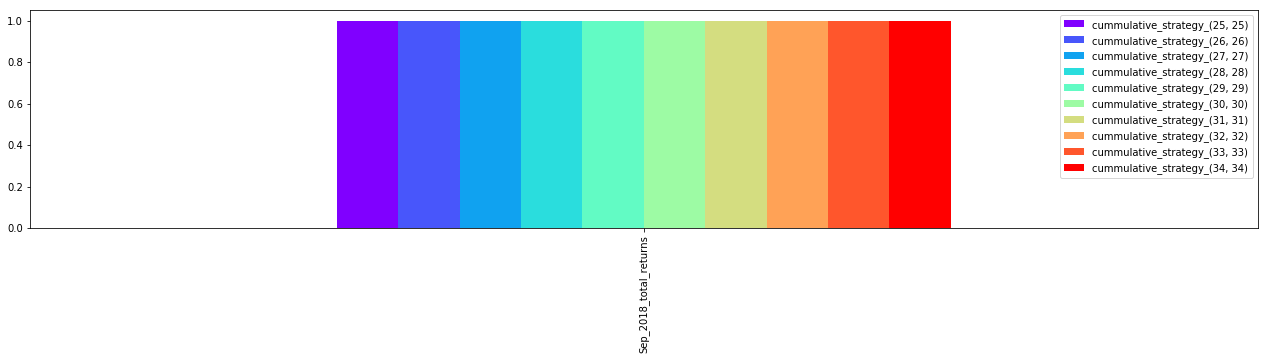

In [31]:

results = df[[i for i in df.columns if i.startswith("cummulative")]].tail(1).T.sort_values(by=df.index[-1], ascending=False)
results.columns = [i.strftime("%b_%Y")+"_total_returns" for i in results.columns]
results.head(10).T.plot(kind="bar", figsize=(22,4), cmap="rainbow")


In [32]:
results

,Sep_2018_total_returns
"cummulative_strategy_(25, 25)",1.000000
"cummulative_strategy_(26, 26)",1.000000
"cummulative_strategy_(27, 27)",1.000000
"cummulative_strategy_(28, 28)",1.000000
"cummulative_strategy_(29, 29)",1.000000
"cummulative_strategy_(30, 30)",1.000000
"cummulative_strategy_(31, 31)",1.000000
"cummulative_strategy_(32, 32)",1.000000
"cummulative_strategy_(33, 33)",1.000000
"cummulative_strategy_(34, 34)",1.000000
